In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn import linear_model

In [2]:
# Settings:
pd.set_option('display.width', 190)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('max_colwidth', 200)
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('default')
np.set_printoptions(threshold = 30, edgeitems = 30, precision = 2, suppress = False)

In [3]:
# Read the data and do a little bit of wrangling:
df = pd.read_csv("BCI-values.csv")
target = pd.read_csv("USRECD.csv")
target = target.rename({"DATE": "Date"}, axis=1)
df.Date = pd.to_datetime(df.Date)
target.Date = pd.to_datetime(target.Date)
df = pd.merge(df, target, on="Date")
df = df.sort_values(ascending=True, by="Date")
df = df.set_index("Date")


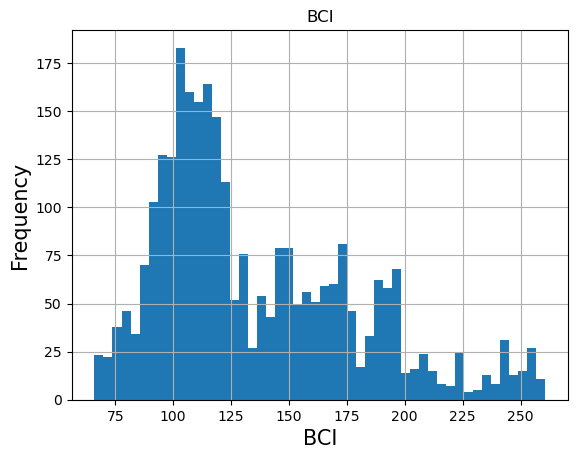

<AxesSubplot:xlabel='Date'>

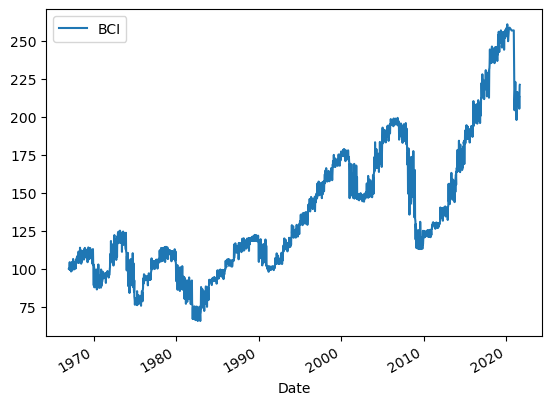

In [4]:
# Histograms of features before logarithmic transformation:
df.hist(column = "BCI", bins = 50)
plt.xlabel("BCI",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCI")

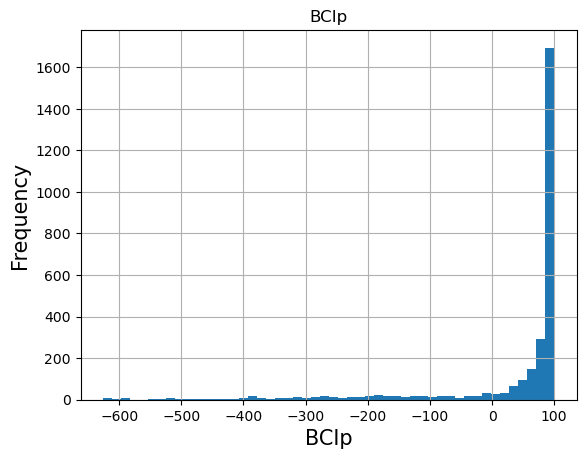

<AxesSubplot:xlabel='Date'>

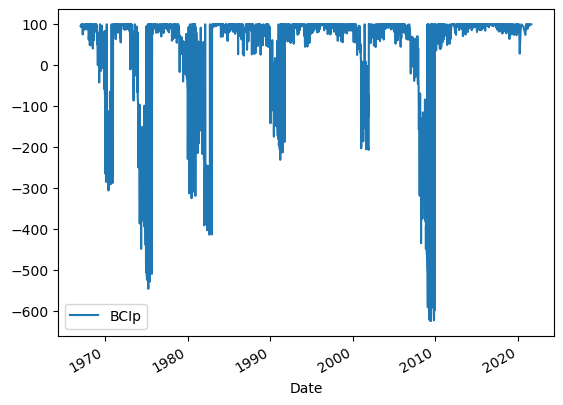

In [5]:
df.hist(column = "BCIp", bins = 50)
plt.xlabel("BCIp",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIp")

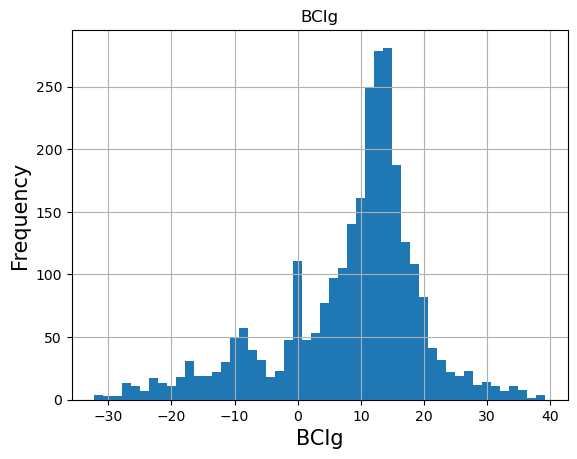

<AxesSubplot:xlabel='Date'>

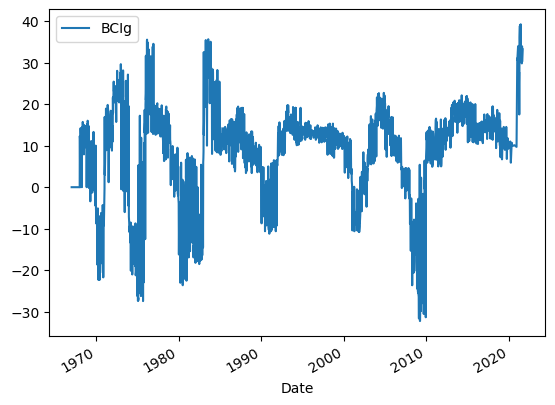

In [6]:
df.hist(column = "BCIg", bins = 50)
plt.xlabel("BCIg",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIg")


In [7]:
# Log transformations on the data:
df.BCI = df.BCI.apply(lambda x: np.log(x))
df.BCIg = df.BCIg.apply(lambda x: np.log(x + abs(min(df.BCIg)) + 0.1)) # Because there are values that are negative, we transform all values just a little bit positive to be able to make a logarithmic transformation.
df.BCIp = df.BCIp.apply(lambda x: np.log(x + abs(min(df.BCIp)) + 0.1))


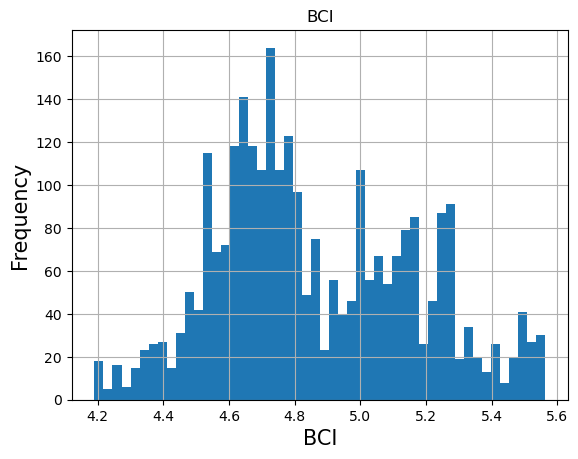

<AxesSubplot:xlabel='Date'>

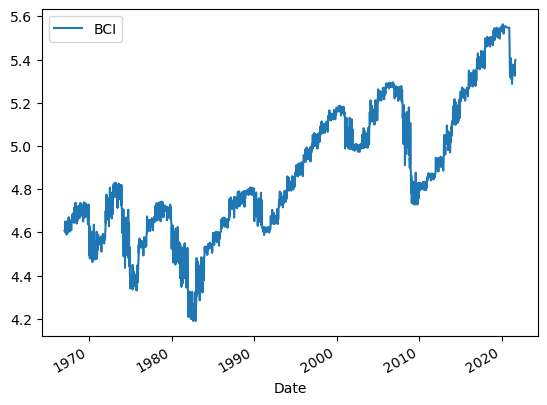

In [8]:
# Histograms of features after logarithmic transformation:
df.hist(column = "BCI", bins = 50)
plt.xlabel("BCI",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCI")

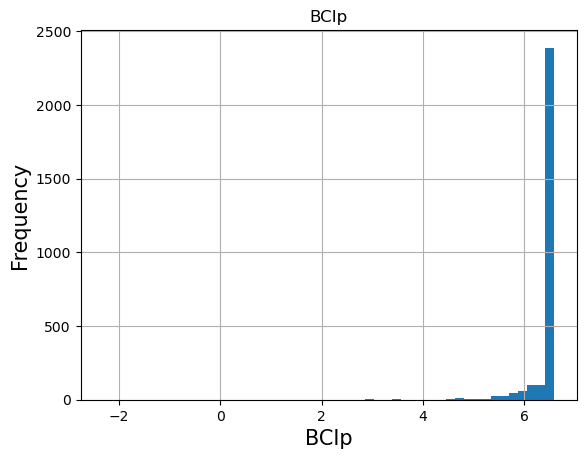

<AxesSubplot:xlabel='Date'>

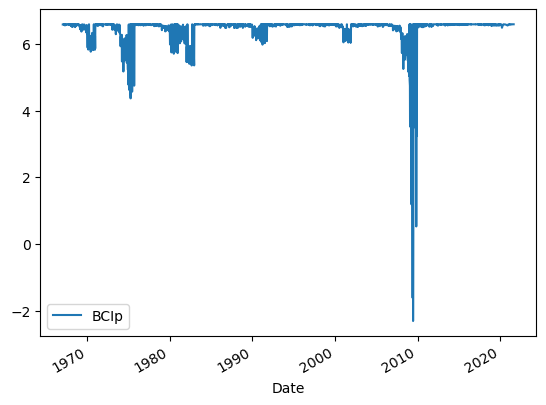

In [9]:
df.hist(column = "BCIp", bins = 50)
plt.xlabel("BCIp",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIp")

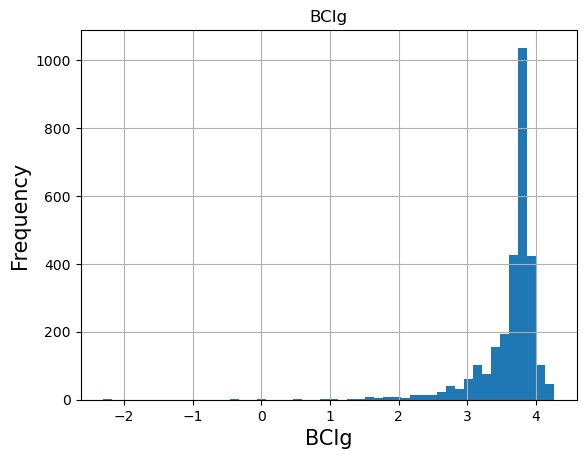

<AxesSubplot:xlabel='Date'>

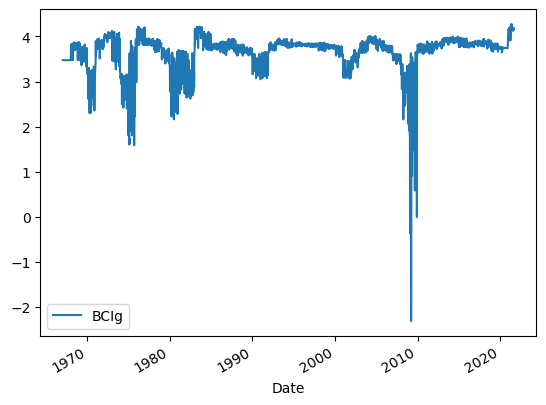

In [10]:
df.hist(column = "BCIg", bins = 50)
plt.xlabel("BCIg",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIg")

In [11]:
# Split into training (+validation) and test sets
tscv = TimeSeriesSplit()
print(tscv)
for train_index, test_index in tscv.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index, df.columns != "USRECD"], df.iloc[test_index, df.columns != "USRECD"]
    y_train, y_test = df.iloc[train_index, df.columns == "USRECD"], df.iloc[test_index, df.columns == "USRECD"]


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29 ... 437 438 439 440 441
 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459
 460 461 462 463 464 465 466] TEST: [467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484
 485 486 487 488 489 490 491 492 493 494 495 496 ... 903 904 905 906 907
 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925
 926 927 928 929 930 931 932]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29 ... 903 904 905 906 907
 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925
 926 927 928 929 930 931 932] TEST: [ 933  934  935  936  937  938  939  940  941  942  943  944  945  946
  947  948  949  950  951  952  953  954  955  956  957  958  959  960
  961  962 ..

In [12]:
# Standardization/z-score normalization/scaling for training set:
X_train = X_train.copy()

scaler = StandardScaler()
z_score_scaler_bci = scaler.fit(X_train['BCI'].values.reshape(-1,1))
X_train['BCI'] = z_score_scaler_bci.transform(X_train['BCI'].values.reshape(-1,1))

scaler = StandardScaler()
z_score_scaler_bcip = scaler.fit(X_train['BCIp'].values.reshape(-1,1))
X_train['BCIp'] = z_score_scaler_bcip.transform(X_train['BCIp'].values.reshape(-1,1))

scaler = StandardScaler()
z_score_scaler_bcig = scaler.fit(X_train['BCIg'].values.reshape(-1,1))
X_train['BCIg'] = z_score_scaler_bcig.transform(X_train['BCIg'].values.reshape(-1,1))


In [13]:
z_score_scaler_bci.mean_, z_score_scaler_bcip.mean_, z_score_scaler_bcig.mean_

(array([4.78]), array([6.42]), array([3.59]))

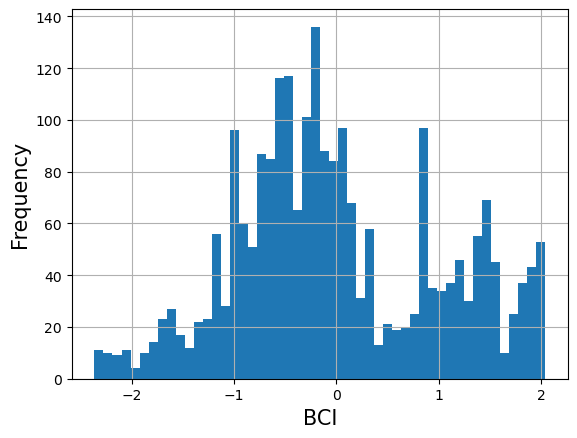

<AxesSubplot:xlabel='Date'>

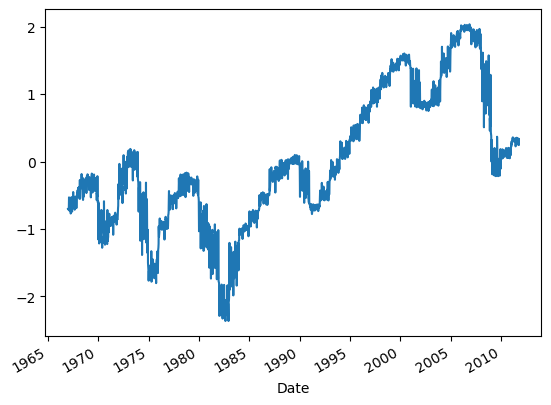

In [14]:
# Histograms of training set after z-score normalization:
X_train.BCI.hist(bins = 50)
plt.xlabel("BCI",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
X_train.BCI.plot(x="Date", y="BCI")

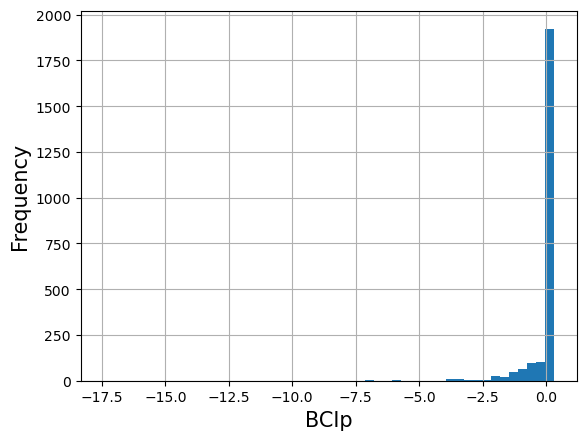

<AxesSubplot:xlabel='Date'>

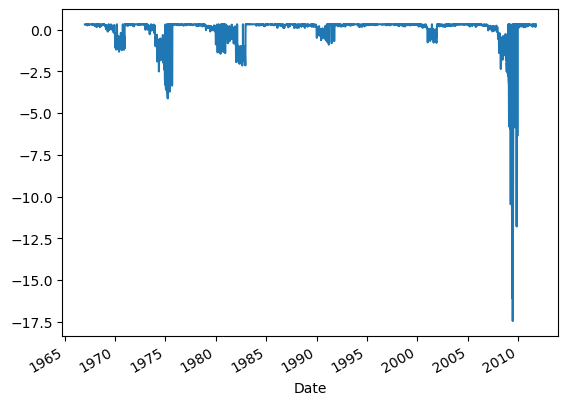

In [15]:
X_train.BCIp.hist(bins = 50)
plt.xlabel("BCIp",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
X_train.BCIp.plot(x="Date", y="BCIp")

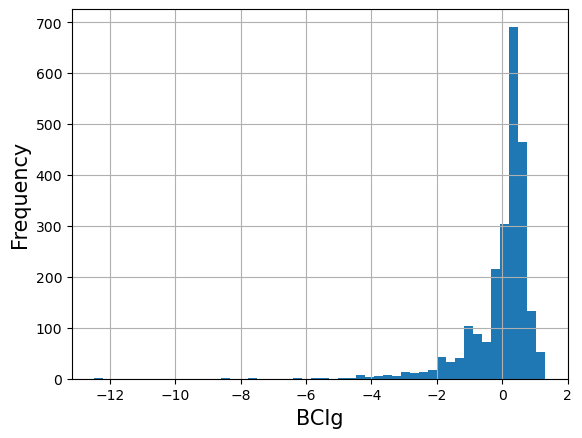

<AxesSubplot:xlabel='Date'>

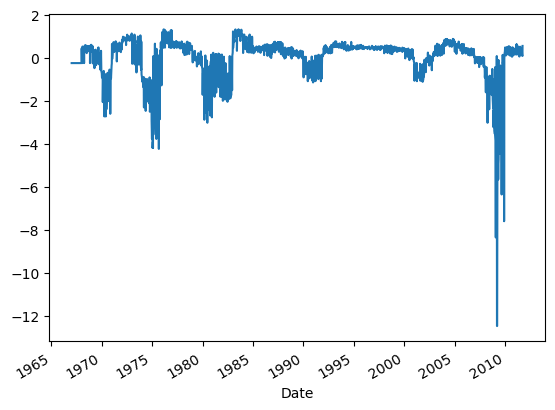

In [16]:
X_train.BCIg.hist(bins = 50)
plt.xlabel("BCIg",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
X_train.BCIg.plot(x="Date", y="BCIg")


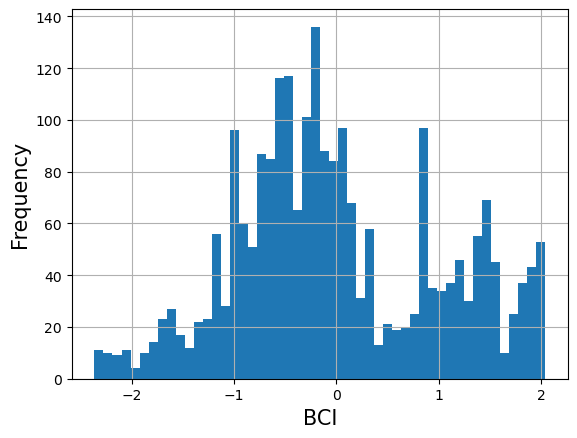

<AxesSubplot:xlabel='Date'>

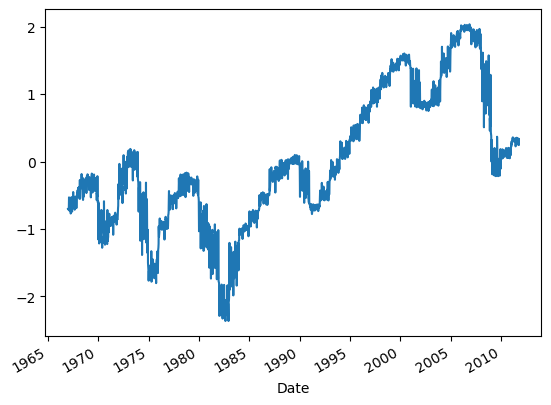

In [17]:
# Histograms of training set after min-max normalization:
X_train.BCI.hist(bins = 50)
plt.xlabel("BCI",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
X_train.BCI.plot(x="Date", y="BCI")

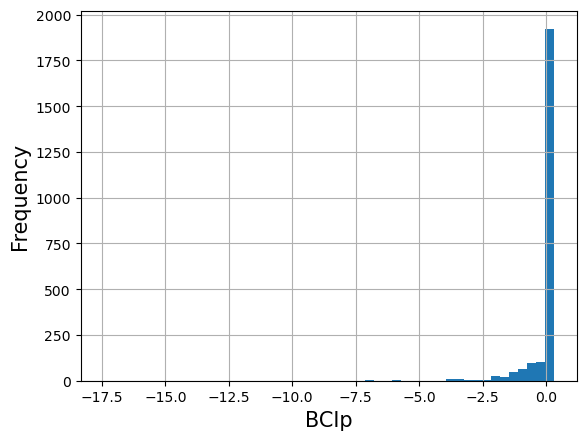

<AxesSubplot:xlabel='Date'>

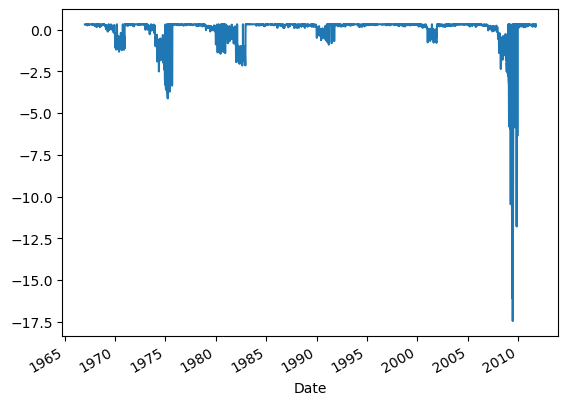

In [18]:
X_train.BCIp.hist(bins = 50)
plt.xlabel("BCIp",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
X_train.BCIp.plot(x="Date", y="BCIp")

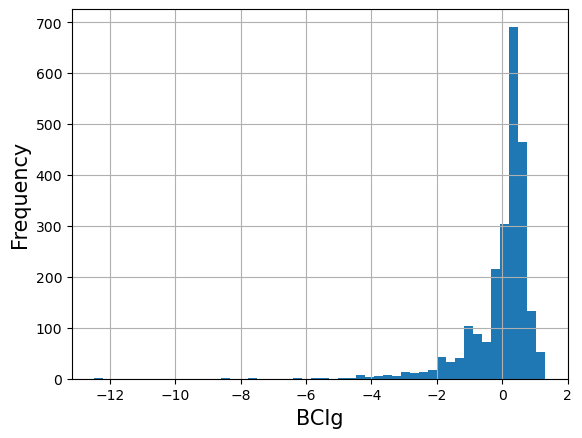

<AxesSubplot:xlabel='Date'>

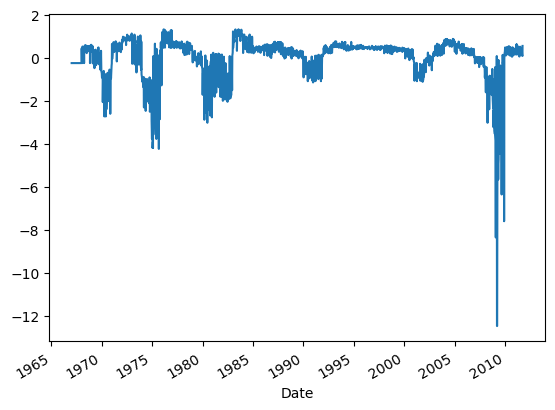

In [19]:
X_train.BCIg.hist(bins = 50)
plt.xlabel("BCIg",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
X_train.BCIg.plot(x="Date", y="BCIg")


In [20]:
# # Standardization/z-score normalization/scaling for testing set:
X_test = X_test.copy()
X_test['BCI'] = z_score_scaler_bci.transform(X_test['BCI'].values.reshape(-1,1))

X_test['BCIp'] = z_score_scaler_bcip.transform(X_test['BCIp'].values.reshape(-1,1))

X_test['BCIg'] = z_score_scaler_bcig.transform(X_test['BCIg'].values.reshape(-1,1))

In [21]:
lr = linear_model.LinearRegression().fit(X_train, y_train)